# Support Vector Machines
Vamos criar os mesmos dados falsos de cluster de renda/idade que usamos em nosso exemplo de cluster K-Means:

In [1]:
import numpy as np

# Cria dados fictícios de renda/idade para N pessoas em k clusters
def createClusteredData(N, k):
    # Define uma semente aleatória para garantir resultados reproduzíveis
    np.random.seed(1234)
    
    # Calcula quantos pontos por cluster devem ser gerados
    pointsPerCluster = float(N) / k
    
    # Inicializa listas para armazenar os dados de entrada (X) e os rótulos (y)
    X = []  # Lista para armazenar os pontos de dados
    y = []  # Lista para armazenar os rótulos dos clusters
    
    # Loop sobre o número de clusters
    for i in range(k):
        # Gera um centróide de renda aleatório dentro de um intervalo específico
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        # Gera um centróide de idade aleatório dentro de um intervalo específico
        ageCentroid = np.random.uniform(20.0, 70.0)
        
        # Gera pontos de dados em torno do centróide para o cluster atual
        for j in range(int(pointsPerCluster)):
            # Adiciona um ponto de dados com renda e idade baseados em uma distribuição normal
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            # Adiciona o rótulo do cluster correspondente a esse ponto de dados
            y.append(i)
    
    # Converte as listas de pontos de dados e rótulos para arrays numpy
    X = np.array(X)
    y = np.array(y)
    
    # Retorna os dados e os rótulos gerados
    return X, y


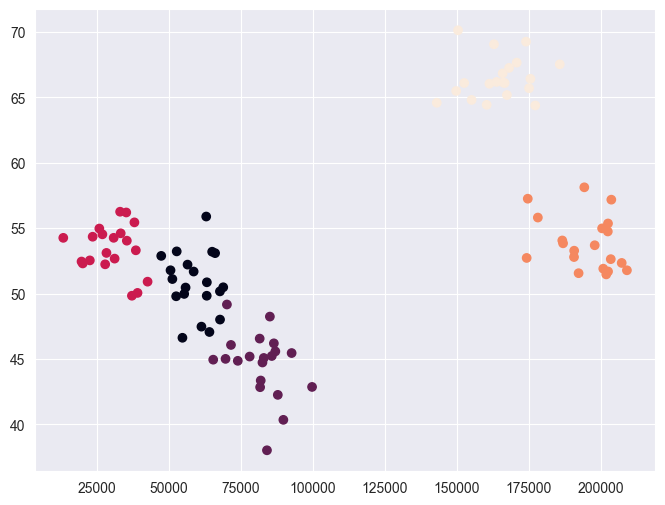

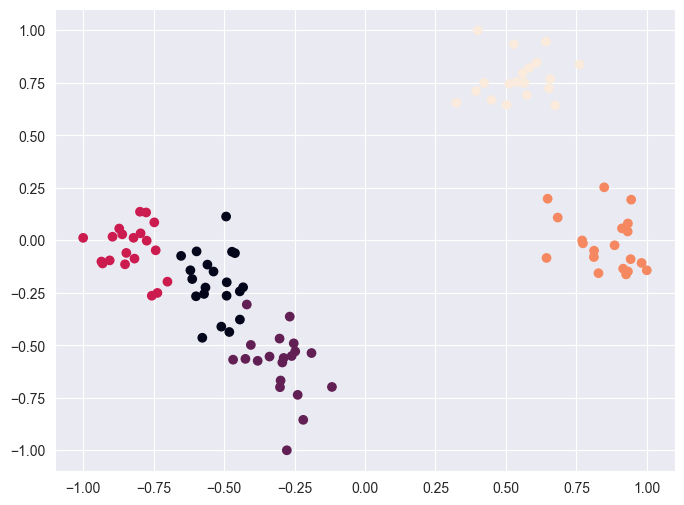

In [2]:
# Permite que os gráficos sejam exibidos diretamente no notebook
%matplotlib inline

# Importa todas as funções da biblioteca pylab
from pylab import *

# Importa o MinMaxScaler da biblioteca sklearn para normalização
from sklearn.preprocessing import MinMaxScaler

# Gera dados fictícios com 100 pontos e 5 clusters
(X, y) = createClusteredData(100, 5)

# Cria uma figura com tamanho 8x6 polegadas
plt.figure(figsize=(8, 6))
# Plota os pontos de dados, colorindo-os de acordo com os rótulos dos clusters
plt.scatter(X[:, 0], X[:, 1], c=y.astype(float))
# Exibe o gráfico
plt.show()

# Normaliza os dados X para um intervalo entre -1 e 1
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X)
# Transforma os dados X usando o scaler
X = scaling.transform(X)

# Cria outra figura com tamanho 8x6 polegadas
plt.figure(figsize=(8, 6))
# Plota os dados normalizados, colorindo-os de acordo com os rótulos dos clusters
plt.scatter(X[:, 0], X[:, 1], c=y.astype(float))
# Exibe o gráfico
plt.show()


In [3]:
# Importa o módulo svm da biblioteca sklearn para suporte a máquinas vetoriais
from sklearn import svm, datasets

# Define o parâmetro de regularização C
C = 1.0

# Cria um classificador SVM com um kernel linear e ajusta (treina) o modelo aos dados (X, y)
svc = svm.SVC(kernel='linear', C=C).fit(X, y)


Ao configurar uma malha densa de pontos na grade e classificar todos eles, podemos renderizar as regiões de cada cluster como cores distintas:

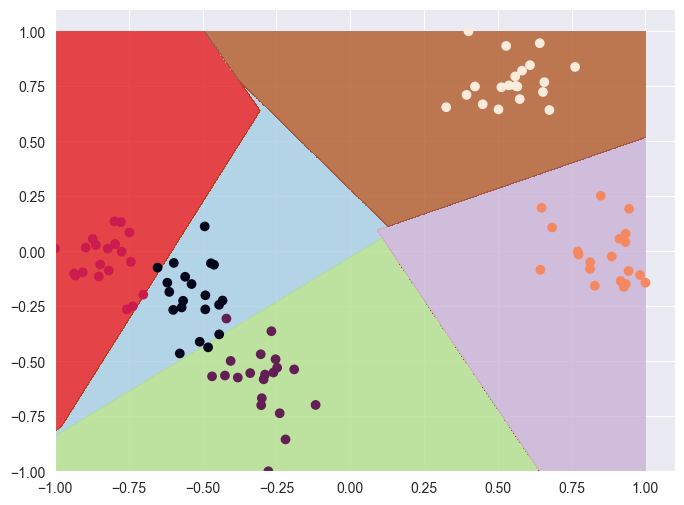

In [4]:
def plotPredictions(clf):
    # Cria uma grade densa de pontos para amostragem no espaço
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                         np.arange(-1, 1, .001))
    
    # Converte as grades para arrays Numpy
    npx = xx.ravel()  # Achata a grade xx em um vetor
    npy = yy.ravel()  # Achata a grade yy em um vetor
    
    # Converte os vetores 1D para uma lista de pontos 2D (renda, idade)
    samplePoints = np.c_[npx, npy]  # Combina npx e npy em um array 2D
    
    # Gera rótulos preditivos (números de clusters) para cada ponto amostrado
    Z = clf.predict(samplePoints)  # Aplica o classificador para prever

    plt.figure(figsize=(8, 6))  # Cria uma nova figura
    Z = Z.reshape(xx.shape)  # Redimensiona os resultados para combinar com a dimensão de xx
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)  # Desenha os contornos com as previsões
    plt.scatter(X[:,0], X[:,1], c=y.astype(float))  # Plota os pontos originais coloridos conforme seus rótulos
    plt.show()  # Exibe o gráfico

# Chama a função para plotar as previsões do classificador SVM
plotPredictions(svc)


In [5]:
print(svc.predict(scaling.transform([[200000, 40]])))

[3]


In [6]:
print(svc.predict(scaling.transform([[50000, 65]])))

[2]


## Activity
"Linear" é um dos muitos kernels suportados pelo scikit-learn no SVC. Consulte a documentação on-line do scikit-learn para descobrir quais são as outras opções possíveis do kernel. Algum deles funciona bem para este conjunto de dados?

In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Criar uma lista de opções de kernels para testar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    svc = svm.SVC(kernel=kernel, C=1.0)  # Ajuste o parâmetro C conforme necessário
    svc.fit(X, y)  # Ajustar o modelo
    predictions = svc.predict(X)  # Prever os mesmos dados
    accuracy = accuracy_score(y, predictions)  # Calcular a precisão
    results[kernel] = accuracy
    print(f'Accuracy with {kernel} kernel: {accuracy:.2f}')


Accuracy with linear kernel: 0.97
Accuracy with poly kernel: 0.96
Accuracy with rbf kernel: 0.97
Accuracy with sigmoid kernel: 0.87


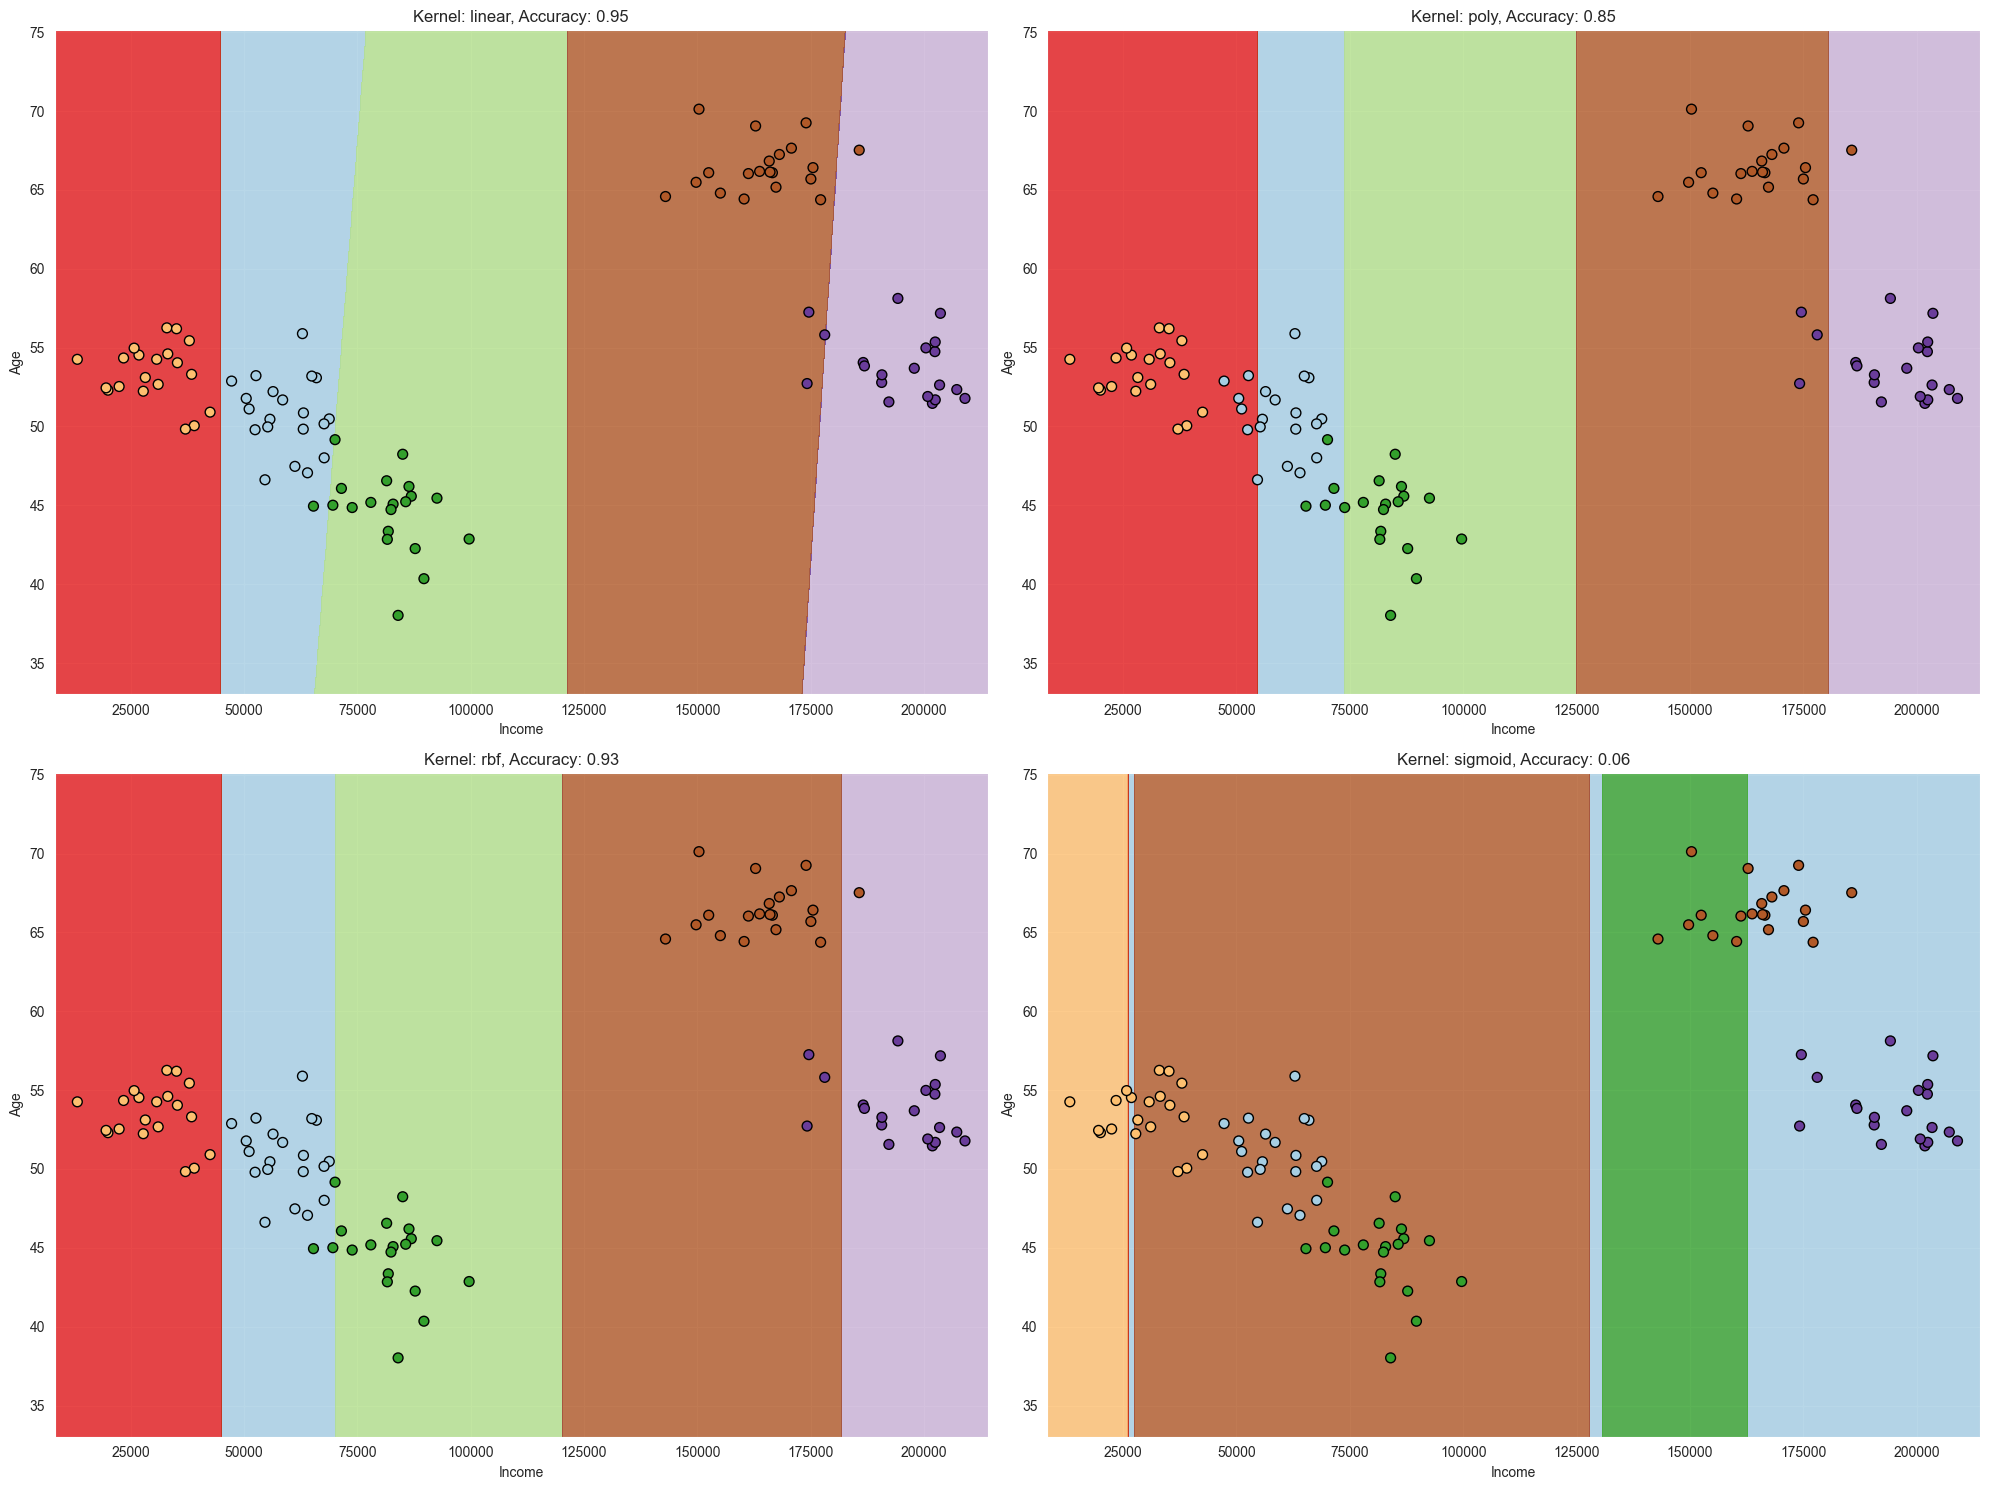

Accuracy with linear kernel: 0.95
Accuracy with poly kernel: 0.85
Accuracy with rbf kernel: 0.93
Accuracy with sigmoid kernel: 0.06


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Função para criar dados de cluster
def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N) / k
    X = []
    y = []
    for i in range(k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    return np.array(X), np.array(y)

# Criar dados
X, y = createClusteredData(100, 5)

# Listar kernels a serem testados
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

# Criar um gráfico para cada kernel
plt.figure(figsize=(20, 15))

for i, kernel in enumerate(kernels):
    # Ajustar o modelo SVC
    svc = svm.SVC(kernel=kernel, C=1.0)
    svc.fit(X, y)
    
    # Prever os rótulos
    predictions = svc.predict(X)
    accuracy = accuracy_score(y, predictions)  # Calcular a precisão
    results[kernel] = accuracy
    
    # Criar uma grade de pontos para desenhar a fronteira de decisão
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 5000, X[:, 0].max() + 5000, 100),
                         np.arange(X[:, 1].min() - 5, X[:, 1].max() + 5, 0.1))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotar a fronteira de decisão
    plt.subplot(2, 2, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.Paired)
    plt.title(f'Kernel: {kernel}, Accuracy: {accuracy:.2f}')
    plt.xlabel('Income')
    plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Mostrar resultados de precisão
for kernel, accuracy in results.items():
    print(f'Accuracy with {kernel} kernel: {accuracy:.2f}')
